$n$次テイラー展開と$n$次多項式フィッティング
==
Q. sin関数の$n$次テイラー展開と$n$次多項式フィッティングの結果は一致するか？<br>
A. 一致しない

In [13]:
from matplotlib.font_manager import FontProperties

font_path = u'/Library/Fonts/ヒラギノ角ゴ Pro W3.otf'
font_prop = FontProperties(fname=font_path)
plt.rc('font',family=font_prop.get_name())

sin関数の近似
--
#### 参考
sin関数のテイラー展開
http://www.maroon.dti.ne.jp/koten-kairo/works/fft/euler3.html

In [68]:
import math
from sklearn.linear_model import LinearRegression

class ApproxSin(object):
    """ sin関数の近似 """
    def __init__(self, n):
        self.n = n
        self.X = None
        self.y = None

    def taylor(self, x):
        """ テイラー展開によるsin関数の近似 """          
        
        def taylor_scalar(x, n):
            """ スカラー版 """
            val = 0.
            for i in xrange(1, n, 4):
                val += float(x ** i) / math.factorial(i)
            for i in xrange(3, n, 4):
                val -= float(x ** i) / math.factorial(i)
            return val

        if hasattr(x, '__iter__'):
            return np.array([taylor_scalar(x_scalar, self.n) for x_scalar in x])
        else:
            return taylor_scalar(x, self.n)

    def polynominal(self, x):
        """ xのn次までの多項式をとりn次元の特徴ベクトルとする　"""
        
        def polynominal_scalar(x, n):
            """ スカラー版 """
            fv = np.zeros(n)
            for i in xrange(n):
                fv[i] = x ** i
            return fv

        if hasattr(x, '__iter__'):
            return [polynominal_scalar(x_scalar, self.n) for x_scalar in x]
        else:
            return polynominal_scalar(x, self.n)
    
    def polynomial_fitting(self, x):
        """ 多項式フィッティングによるsin関数の近似 """
        lr = LinearRegression()
        radians = np.linspace(0, np.pi * 2, self.n, endpoint=False)
        self.X = self.polynominal(radians)
        self.y = np.sin(radians)
        lr.fit(self.X, self.y)
        return lr.predict(self.polynominal(x))

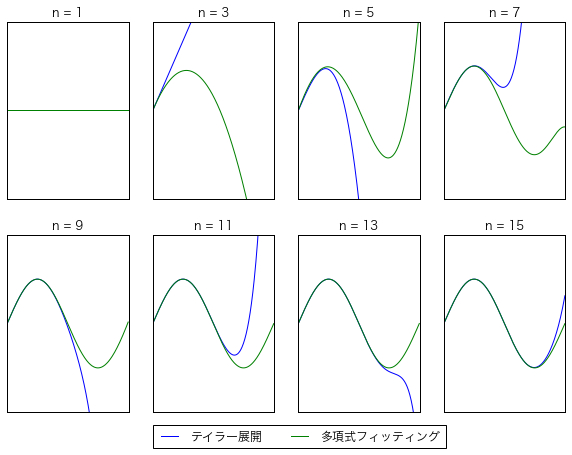

In [79]:
from skimage.measure import compare_mse

radians = np.linspace(0, np.pi * 2, 360)
y = np.sin(radians)

fig, ax = plt.subplots(2, 4, figsize=(10, 7))
ax = ax.flatten()
err_taylor = []
err_poly = []
for i, n in enumerate(xrange(1, 16, 2)):
    approx_sin= ApproxSin(n)
    taylor = approx_sin.taylor(radians)
    poly = approx_sin.polynomial_fitting(radians)
    ax[i].plot(taylor, label=u'テイラー展開')
    ax[i].plot(poly, label=u'多項式フィッティング')
    ax[i].set_ylim(-2, 2)
    ax[i].set_xlim(0, 360)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_title('n = {}'.format(n))
    
    err_taylor.append(compare_mse(y, taylor))
    err_poly.append(compare_mse(y, poly))

ax[-1].legend(bbox_to_anchor=(-2.4, -0.2), loc='lower left', ncol=2, borderaxespad=0.)
plt.savefig('approx_sin.png', dpi=220)

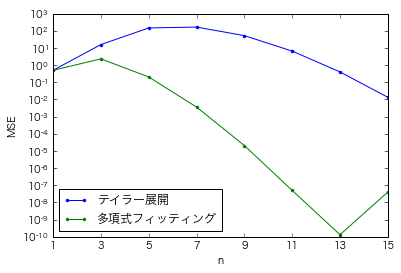

In [86]:
plt.figure()
plt.semilogy(xrange(1, 16, 2), err_taylor, '.-', label=u'テイラー展開')
plt.semilogy(xrange(1, 16, 2), err_poly, '.-', label=u'多項式フィッティング')
plt.legend(loc='best')
plt.ylabel('MSE')
plt.xlabel('n')
plt.xticks(xrange(1, 16, 2))
plt.xlim(1, 15)
plt.savefig('approx_sin_mse.png', dpi=220)